In [1]:
from run_dummy import *

## Loading the data files

#### NOTE: to use the fitting function you need to provide the uncertainty for both x- and y-data (e.g. energy and flux).  For the uncertainty you can use for example 10% of the x and y data.
<br> provide the path to the file. The file can be in either txt or csv format. If the data is in xlsx format use pd.read_excel() instead of pd.read_csv()


In [2]:
#path_to_file = r'C:/Users/Omistaja/Desktop/SRL/2021SRL/messenger/event1.txt'
path =  r'/home/annafed/Documents/Fits_Lengying/Re _Spectral_index_study/BepiColombo_EnergySpectrum.csv'
data = pd.read_csv(path) # or pd.read_excel() for xlsx data


#### Choose what to fit. The file can contain all kinds of data and multiple columns etc. Below, you need to choose what you want to fit. Choose x-axis data and y-axis data. 

In [3]:
x_data = data['BepiColombo - Energy (MeV)']
y_data = data['flux at 1-hour before shock']
#x_err = data['name of column with x uncertainty data'] 
#y_err = data['name of column with y uncertainty data']

# if the data doesn't contain uncertainty it still needs to be provided for the fitting functions to works
# e.g. use 10% of the data 
x_err = x_data*0.1
y_err = y_data*0.1


## Saving data 
#### You can choose to save the plot (savefig), the ODR run as a pickle file (save_pickle) and save all the variables from the fitting procedure (save_fit_variables) by setting the options below to True

In [9]:
savefig = False # save the fit
save_pickle = False # save a pickle file of the odr run
save_fit_variables = False # save the variables from the fit

In [4]:
data_for_the_fit = pd.DataFrame()
data_for_the_fit['x'] = x_data
data_for_the_fit['y'] = y_data
data_for_the_fit['x_err'] = x_err
data_for_the_fit['y_err'] = y_err

In [5]:
plot_title = 'BepiColombo spectrum - 1 hour before shock'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 

## INPUTS FOR THE FIT

### which_fit options: 
<br>'single' will force a single pl fit to the data
<br> 'broken' will force a broken pl fit to the data but ONLY if the break point is within the energy range otherwise a sigle pl fit will be produced instead
<br> 'best_sb' will choose automatically the best fit type between single and broken by comparing the redchis of the fits
<br> 'cut' will produce a single pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'broken_cut' will produce a broken pl fit with an exponential cutoff point. If the cutoff point is outside of the energy range a broken or single pl will be fit instead
<br> 'best_cb' will choose the better option between a broken pl and a single+cutoff. If the break and cutoff points are outside of the energy range a single pl will be fit instead.
<br>'triple' will try to fit a triple pl. If not possible, will try to fit the next best option.
<br> 'best' will choose automatically the best fit type by comparing the redchis of the fits


In [6]:
which_fit = 'best' 

## Guess values and energy range
#### NOTE: e_min, e_max, break_guess and cut_guess should bein MeV. e_min and e_max can also be None. In this case the MAKE_THE_FIT function will automaically choose the values. (energy on x-axis)

<br>Random and iterations
<br>if use_random = False the fit will only be made once with the guess values
<br> if use_random = True the fitting function will first create a list of reasonable values for each of the fitting parameters then randomly select values from the lists and compare the redchis of each fit to find the best one
<br> iterations = number of times the fit is retried to find the best one

In [7]:
e_min =  None # in MeV 
e_max =	0.089 # in MeV

g1_guess = -1.9 # gamma 1 -> spectral index before the break (or single pl)
g2_guess = -2.5 # gamma 2 -> spectral index after the break (for broken pl)
g3_guess = -4.5 # gamma 3 -> spectral index after the second break (for triple pl)
c1_guess = 1e3 # peak flux
alpha_guess = 7.16 # sharpness of the first break
beta_guess = 10 #sharpness of the second break
break_guess_low = 0.06 #in MeV
break_guess_high = 0.12
cut_guess = 0.12 #in MeV

#legend_details = False

use_random = True 
iterations = 20

In [10]:
plot_title = 'BepiColombo spectrum - 1 hour before shock'
x_label = 'Energy (MeV)'
y_label = 'Flux\n/(s cm² sr MeV)'
legend_title = '' 


/home/annafed/Documents/GitHub/GeneralFittingSoftware/my_power_law_fits_odr.py:43: RuntimeWarning: overflow encountered in power
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/home/annafed/Documents/GitHub/GeneralFittingSoftware/my_power_law_fits_odr.py:43: RuntimeWarning: overflow encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/home/annafed/Documents/GitHub/GeneralFittingSoftware/my_power_law_fits_odr.py:43: RuntimeWarning: invalid value encountered in divide
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/home/annafed/Documents/GitHub/GeneralFittingSoftware/my_power_law_fits_odr.py:43: RuntimeWarning: invalid value encountered in double_scalars
  y = c1 * (x/0.1)**gamma1  * ((x**alpha + E_break**alpha)/(0.1**alpha+E_break**alpha))**((gamma2-gamma1)/alpha)
/ho

single


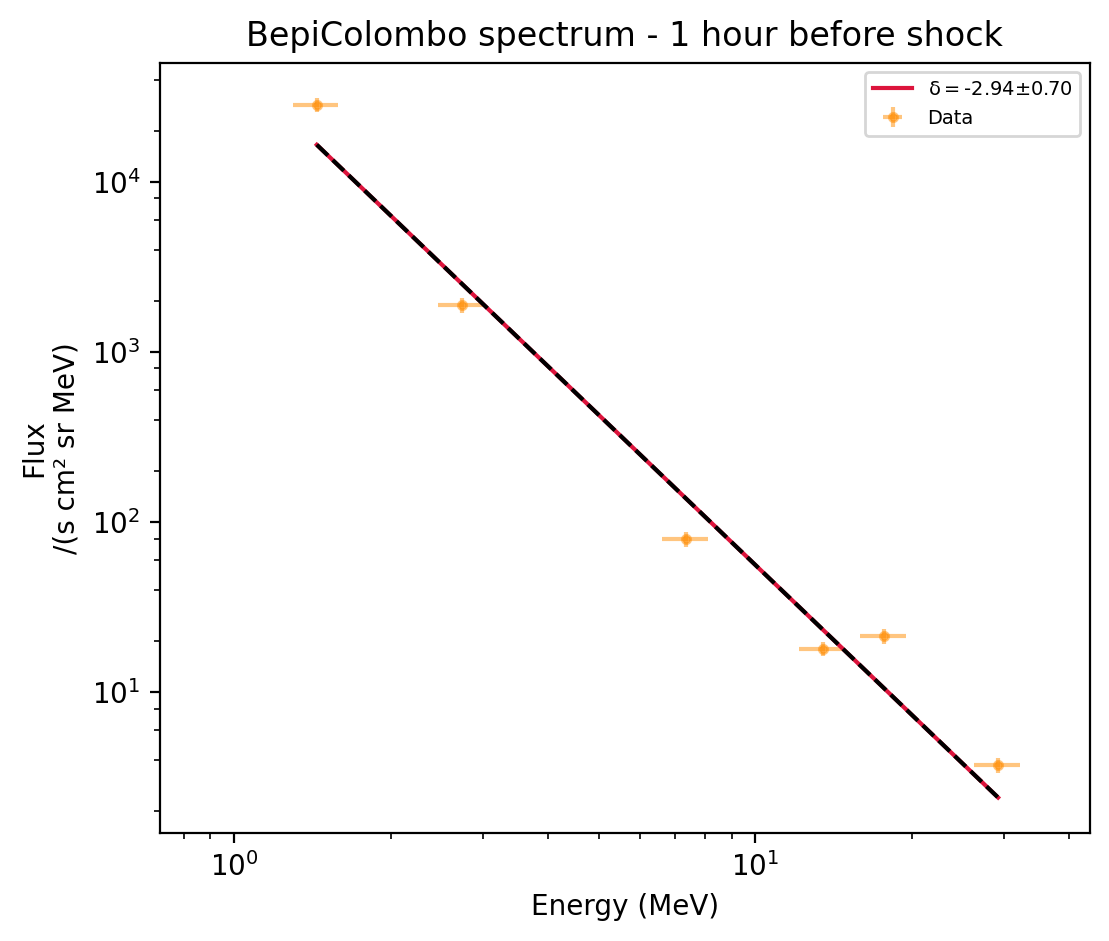

In [11]:
run_all(path, data_for_the_fit, savefig = True, plot_title = plot_title, x_label = x_label, y_label = y_label, legend_title = legend_title, which_fit = 'best')
